### 의사결정나무 정리
장점
- 쉽고 해석 용이
- 다중분류 회귀에 모두 적용 가능
- 이상치 견고해 데이터 스케일링 불필요
단점
- 성장 많이하면 과대적합 오류
- 훈련 데이터에 민감하게 반응해 작은 변화,노이즈에 나무 구조 크게 달라짐
의사결정 나무는 나무가 성장을 많이 하면 과대적합. > 보완하기 위한 방법 있다.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

titanic_df = pd.read_csv('/Users/jun/GitStudy/Data_4/Data/titanic/titanic/train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


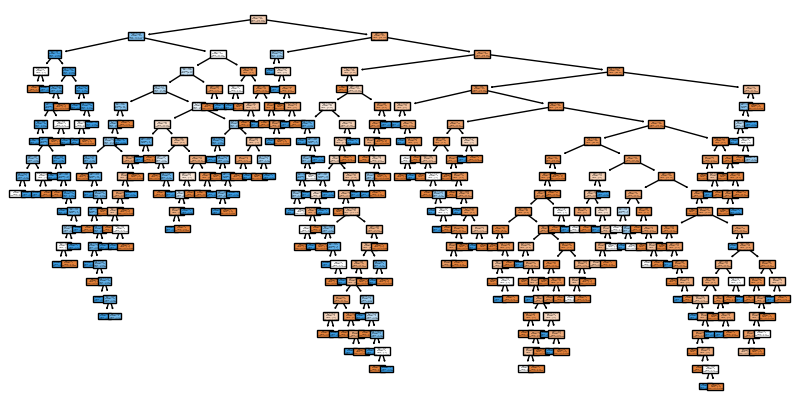

In [27]:
X_features = ['Pclass' ,'Sex','Age','Fare','Embarked']
# Pclass : LabelEncoder
# Sex : LabelEncder
# Age : 결측치 -> 평균으로 대치하고

le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

le2 = LabelEncoder()
titanic_df['Pclass']  = le2.fit_transform(titanic_df['Pclass'])

age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(age_mean)

le3 = LabelEncoder()
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'] = le3.fit_transform(titanic_df['Embarked'])


X = titanic_df[X_features]
y = titanic_df['Survived']

model_dt = DecisionTreeClassifier()
model_dt.fit(X,y)

plt.figure(figsize= (10,5))
plot_tree(model_dt, feature_names = X_features, class_names= ['Not Survived','Survived'],filled=True) 
plt.show()


### 랜덤포레스트
#### 배깅
Bootstrapping + Aggregating 방법론
데이터 부족 문제를 해결하기 위해서 데이터 복원추출해서 유사하지만 다른 데이터 집단을 생성.
#### tree를 Forest로 만들기
하나 데이터셋에서
여러 의사결정트리가 나오고 각 자리의 다수결의 법칙에 따라 결론을 냄.
데이터가 적은 경우 랜덤포레스트가 좋은 성능.

#### 랜덤포레스트 정리
장점 
- 배깅 과적합 피할 수 있다
- 이상치 견고하다
- 변수 중요도 추출해 모델 해석에 중요 특징 파악 가능

단점
- 컴퓨터 리소스 비용 크다
- 앙상븡 적용으로 해석 어렵다

In [28]:
#로지스틱회귀, 의사결정나무, 랜덤포레스트
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

model_lor = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_lor.fit(X,y)
model_dt.fit(X,y)
model_rf.fit(X,y)

y_lor_pred = model_lor.predict(X)
y_dt_pred = model_dt.predict(X)
y_rf_pred = model_rf.predict(X)

def get_score(model_name, y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred),2)
    f1 = round(f1_score(y_true,y_pred),2)
    print(model_name, 'acc 스코어는 : ', acc, 'f1_score는 ',f1)

get_score('lor', y, y_lor_pred)
get_score('dt', y, y_dt_pred)
get_score('rf', y, y_rf_pred)

lor acc 스코어는 :  0.79 f1_score는  0.72
dt acc 스코어는 :  0.98 f1_score는  0.97
rf acc 스코어는 :  0.98 f1_score는  0.97


In [29]:
X_features

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

In [30]:
#randomforest 장점 ,model_rf.feature_importances_ 뽑을 수 있음
#['Pclass', 'Sex', 'Age']
model_rf.feature_importances_

array([0.09919983, 0.27134353, 0.28856023, 0.3075373 , 0.03335911])

### 3.최근접 이웃
#### 최근접 이웃 알고리즘 수행 방법
k-nearest Neighbor(Knn, KNN). 주변 데이터를 보고 내가 알고싶은 데이터를 예측하는 방법.

#### 하이퍼 파라미터의 개념
- 파라미터 : 머신러닝 모델이 학습 과정에서 추정하는 내부 변수. 자동으로 결정되는 값.(선형회귀에서 가중치와 편향)

- 하이퍼 파라미터 : 데이터 과학자가 기계학습 모델 훈련을 관리하는데 사용하는 외부 구성변수. 모델 학습 과정이나 구조에 영향을 미침

### 부스팅 알고리즘

#### 부스팅 알고리즘 수행 방법
여러 개의 약한 학습기를 순차적으로 학습하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가는 학습 방식.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model_knn = KNeighborsClassifier()
model_gbm = GradientBoostingClassifier()
model_xgb = XGBClassifier(random_state = 42)
model_lgb = LGBMClassifier(random_state = 42)

model_knn.fit(X,y)
model_gbm.fit(X,y)
model_xgb.fit(X,y)
model_lgb.fit(X,y)

y_knn_pred = model_knn.predict(X)
y_gbm_pred = model_gbm.predict(X)
y_xgb_pred = model_xgb.predict(X)
y_lgb_pred = model_lgb.predict(X)

get_score('lor', y, y_lor_pred)
get_score('dt', y, y_dt_pred)
get_score('rf', y, y_rf_pred)
get_score('knn', y, y_lor_pred)
get_score('gbm', y, y_dt_pred)
get_score('xgb', y, y_rf_pred)
get_score('lgb', y, y_lor_pred)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
lor acc 스코어는 :  0.79 f1_score는  0.72
dt acc 스코어는 :  0.98 f1_score는  0.97
rf acc 스코어는 :  0.98 f1_score는  0.97
knn acc 스코어는 :  0.79 f1_score는  0.72
gbm acc 스코어는 :  0.98 f1_score는  0.97
xgb acc 스코어는 :  0.98 f1_score는  0.97
lgb acc 스코어는 :  0.79 f1_score는  0.72
